List of libraries

In [196]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from math import pi
import pickle
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Reading the data 

In [6]:
try:
    data = pd.read_csv("final_cluster1.csv")
    original_data = data.copy()
    print('Podaci ucitani')
except:
    print('Greska u ucitavanju podataka')

Podaci ucitani


In [7]:
print(f"This dataset has: \n{data.shape[1]} columns \n{data.shape[0]} rows")

This dataset has: 
78 columns 
1027772 rows


In [8]:
data.head(10)

GOD  MES  SBSRBR_ID        MSISDN     CA_ID  TENURE  ACTIVE_SMS_DAYS  \
0  2020    4  982086475  387603136012  54450298     631                0   
1  2020    4  982157627   38762360674  50006737    3654                1   
2  2020    4  981214272   38762805771  50087288    1942                0   
3  2020    4  981368873   38761034353  52716753    1418                0   
4  2020    4  981832873   38762795060  54389279     202                0   
5  2020    4  982377115   38761393003  49391562     853                0   
6  2020    4  981255409   38761687130  52815077    5817                0   
7  2020    4  981892339   38762200640  50697282    3654                0   
8  2020    4  981516087   38761879881  45810905    3654                5   
9  2020    4  982051692  387603523361  51126217    1701                0   

   ACTIVE_VOI_DAYS  ACTIVE_GPRS_DAYS SVC_MBR_GRP_TP_NM  PORT_IN_CNT  \
0                2                 1               NaN            0   
1                7                 0               NaN            0   
2               18                31               NaN            0   
3                2                 0               NaN            0   
4               20                 0               NaN            0   
5                0                 8               NaN            0   
6               26                 1               NaN            0   
7                7                 0               NaN            0   
8               20                 0         F&F GRUPA            0   
9                3                11               NaN            0   

   PURCHASE_CNT  REV_PURCHASE_AMT  RECH_AMT  RECH_CNT  \
0             0               NaN       NaN       NaN   
1             0               NaN       2.0       1.0   
2             0               NaN       5.0       1.0   
3             0               NaN       NaN       NaN   
4             0               NaN       NaN       NaN   
5             0               NaN       NaN       NaN   
6             0               NaN       7.0       1.0   
7             0               NaN      10.0       1.0   
8             0               NaN       NaN       NaN   
9             0               NaN       NaN       NaN   

   DOPUNA_PROVISIONING_RELATIVEMOD_ONPEAK_ULTRA  \
0                                           NaN   
1                                           0.0   
2                                           0.0   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           0.0   
7                                           0.0   
8                                           NaN   
9                                           NaN   

   DOPUNA_RECHARGING_ADMIN_OFFERCHANGE  \
0                                  NaN   
1                                  0.0   
2                                  0.0   
3                                  NaN   
4                                  NaN   
5                                  NaN   
6                                  0.0   
7                                  0.0   
8                                  NaN   
9                                  NaN   

   AUTOMATSKA_DOPUNA_PREKO_EVOUCHER_SISTEMA  \
0                                       NaN   
1                                       1.0   
2                                       1.0   
3                                       NaN   
4                                       NaN   
5                                       NaN   
6                                       1.0   
7                                       1.0   
8                                       NaN   
9                                       NaN   

   DOPUNA_PREPAID_ACCOUNTA_SA_DRUGIH_ACCOUNTA  \
0                                         NaN   
1                                         0.0   
2                                         0.0   
3                 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027772 entries, 0 to 1027771
Data columns (total 78 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   GOD                                            1027772 non-null  int64  
 1   MES                                            1027772 non-null  int64  
 2   SBSRBR_ID                                      1027772 non-null  int64  
 3   MSISDN                                         1027772 non-null  int64  
 4   CA_ID                                          1027772 non-null  int64  
 5   TENURE                                         1027772 non-null  int64  
 6   ACTIVE_SMS_DAYS                                1027772 non-null  int64  
 7   ACTIVE_VOI_DAYS                                1027772 non-null  int64  
 8   ACTIVE_GPRS_DAYS                               1027772 non-null  int64  
 9   SVC_MBR_GRP_TP_NM       

Missing values treatment

Check which columns have missing values and how much

In [10]:
data.isnull().sum()

GOD                                                    0
MES                                                    0
SBSRBR_ID                                              0
MSISDN                                                 0
CA_ID                                                  0
TENURE                                                 0
ACTIVE_SMS_DAYS                                        0
ACTIVE_VOI_DAYS                                        0
ACTIVE_GPRS_DAYS                                       0
SVC_MBR_GRP_TP_NM                                 978518
PORT_IN_CNT                                            0
PURCHASE_CNT                                           0
REV_PURCHASE_AMT                                  782340
RECH_AMT                                          344937
RECH_CNT                                          344937
DOPUNA_PROVISIONING_RELATIVEMOD_ONPEAK_ULTRA      344937
DOPUNA_RECHARGING_ADMIN_OFFERCHANGE               344937
AUTOMATSKA_DOPUNA_PREKO_EVOUCHE

A list of columns that will have their NULL values replaced with 0

In [11]:
tmp_table = pd.DataFrame(data.isnull().sum()).reset_index()
tmp_table = tmp_table.rename(columns={"index":"feature", 0:"num_missings"})
tmp_table["percent_missings"] = tmp_table["num_missings"]/data.shape[0]
# show columns with more than e.g. 90% of missings
print(tmp_table[tmp_table["percent_missings"]>0.9])

t = tmp_table[tmp_table["percent_missings"]>0.9]

# if you want to drop those columns from original dataset:
cols_to_drop = list(t["feature"])
data.drop(cols_to_drop, axis=1, inplace=True)

              feature  num_missings  percent_missings
9   SVC_MBR_GRP_TP_NM        978518          0.952077
24       REV_SMS_ROAM       1023138          0.995491


A list of columns that will have their NULL values replaced with mean

In [12]:
data.fillna(value=data.mean(), inplace=True)

In [13]:
data.isnull().sum()

GOD                                                   0
MES                                                   0
SBSRBR_ID                                             0
MSISDN                                                0
CA_ID                                                 0
TENURE                                                0
ACTIVE_SMS_DAYS                                       0
ACTIVE_VOI_DAYS                                       0
ACTIVE_GPRS_DAYS                                      0
PORT_IN_CNT                                           0
PURCHASE_CNT                                          0
REV_PURCHASE_AMT                                      0
RECH_AMT                                              0
RECH_CNT                                              0
DOPUNA_PROVISIONING_RELATIVEMOD_ONPEAK_ULTRA          0
DOPUNA_RECHARGING_ADMIN_OFFERCHANGE                   0
AUTOMATSKA_DOPUNA_PREKO_EVOUCHER_SISTEMA              0
DOPUNA_PREPAID_ACCOUNTA_SA_DRUGIH_ACCOUNTA      

In [189]:
data_num = data.select_dtypes(include=['int64','float64'])
data_num.describe()

(1027772, 73)

In [38]:
std_zero = [x for x in data_num.columns if data_num.describe()[x]['std'] == 0]

In [190]:
std_zero.append('SBSRBR_ID')
std_zero.append('CA_ID')
std_zero.append('MSISDN')
std_zero

['GOD',
 'MES',
 'BPU_KPZAVOD',
 'SBSRBR_ID',
 'CA_ID',
 'MSISDN',
 'SBSRBR_ID',
 'CA_ID',
 'MSISDN']

In [40]:
# remowing ID attributes and attributes with std = 0
data_num.drop(std_zero, 1 ,inplace=True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
data_num.head(10)

TENURE  ACTIVE_SMS_DAYS  ACTIVE_VOI_DAYS  ACTIVE_GPRS_DAYS  PORT_IN_CNT  \
0     631                0                2                 1            0   
1    3654                1                7                 0            0   
2    1942                0               18                31            0   
3    1418                0                2                 0            0   
4     202                0               20                 0            0   
5     853                0                0                 8            0   
6    5817                0               26                 1            0   
7    3654                0                7                 0            0   
8    3654                5               20                 0            0   
9    1701                0                3                11            0   

   PURCHASE_CNT  REV_PURCHASE_AMT   RECH_AMT  RECH_CNT  \
0             0          9.533714  11.431392  1.595951   
1             0          9.533714   2.000000  1.000000   
2             0          9.533714   5.000000  1.000000   
3             0          9.533714  11.431392  1.595951   
4             0          9.533714  11.431392  1.595951   
5             0          9.533714  11.431392  1.595951   
6             0          9.533714   7.000000  1.000000   
7             0          9.533714  10.000000  1.000000   
8             0          9.533714  11.431392  1.595951   
9             0          9.533714  11.431392  1.595951   

   DOPUNA_PROVISIONING_RELATIVEMOD_ONPEAK_ULTRA  \
0                                      0.000473   
1                                      0.000000   
2                                      0.000000   
3                                      0.000473   
4                                      0.000473   
5                                      0.000473   
6                                      0.000000   
7                                      0.000000   
8                                      0.000473   
9                                      0.000473   

   DOPUNA_RECHARGING_ADMIN_OFFERCHANGE  \
0                              0.00001   
1                              0.00000   
2                              0.00000   
3                              0.00001   
4                              0.00001   
5                              0.00001   
6                              0.00000   
7                              0.00000   
8                              0.00001   
9                              0.00001   

   AUTOMATSKA_DOPUNA_PREKO_EVOUCHER_SISTEMA  \
0                                  0.853206   
1                                  1.000000   
2                                  1.000000   
3                                  0.853206   
4                                  0.853206   
5                                  0.853206   
6                                  1.000000   
7                                  1.000000   
8                                  0.853206   
9                                  0.853206   

   DOPUNA_PREPAID_ACCOUNTA_SA_DRUGIH_ACCOUNTA  \
0                                    0.131207   
1                                    0.000000   
2                                    0.000000   
3                                    0.131207   
4                                    0.131207   
5                                    0.131207   
6                                    0.000000   
7                                    0.000000   
8                                    0.131207   
9                                    0.131207   

   IZNOS_DOPUNE_FIZIKIM_ILI_PRINTANIM_VOUCHEROM  \
0                                       0.111141   
1                                       0.000000   
2                                       0.000000   
3                                       0.111141   
4                                       0.111141   
5                                       0.111141   
6                                       0.000000   
7     

In [59]:
outlier_handled = data_num.copy()

In [58]:
# Preprocessing
# Outliers - 2 or 3 std dev

# Function that is going to be used as outlier treatment - 
# Replacing the variable values *above* 2 standard variations with 2 standard variations

def outliers_z_score(ys):
    threshold = 2
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    z_scores = np.array(z_scores)
    mask = z_scores > threshold
    ys[mask] = mean_y + threshold*stdev_y
    return ys

In [60]:
try:
    for x in data_num.columns:
        outlier_handled[x] = outliers_z_score(outlier_handled[x])
except ZeroDivisionError:
    print ("0")

C:\Users\stefanaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\stefanaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\stefanaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\stefanaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWit

In [61]:
outlier_handled.shape

(1027772, 67)

Standardization

In [62]:
#standardization with Standard Scaler
scaler = StandardScaler()
scaler.fit(outlier_handled)    
standard_data_preprocessed = scaler.transform(outlier_handled)
standard_data_preprocessed = pd.DataFrame(data = standard_data_preprocessed, columns = outlier_handled.columns)

In [19]:
#standardization with MinMax Scaler
scalermm = MinMaxScaler()
mm_data_preprocessed = scaler.fit_transform(data_clean)
mm_data_preprocessed = pd.DataFrame(mm_data_preprocessed, columns = data_clean.columns)

PCA

In [63]:
# initialize PCA instance
pca = PCA()

In [64]:
# fitting the pca
clustering_sample_pca = standard_data_preprocessed.copy()
pca.fit(clustering_sample_pca)

PCA()

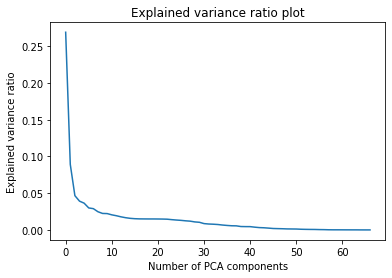

Explained variance ratio of only 1st component:  0.269


In [65]:
# plotting the explained variance ration against the number of components
plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.title("Explained variance ratio plot")
plt.xlabel("Number of PCA components")
plt.ylabel("Explained variance ratio")
plt.show()
print("Explained variance ratio of only 1st component: ", round(pca.explained_variance_ratio_[0], 3))

In [69]:
# check the sum of first n PCA components

n = 7

print("Sum of the first {} PCA components is: {}".format(n, round(sum(pca.explained_variance_ratio_[0:n]), 3)))

Sum of the first 7 PCA components is: 0.539


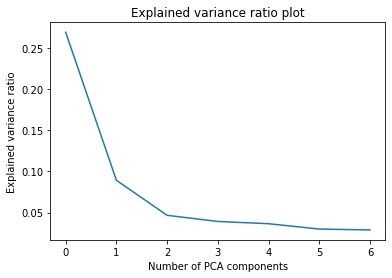

Explained variance ratio of only 1st component:  0.269


In [70]:
# fitting PCA again, but now with chosen number of components

pca = PCA(n_components = 7)

# plotting the explained variance ration against the number of components
pca.fit(clustering_sample_pca)
plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.title("Explained variance ratio plot")
plt.xlabel("Number of PCA components")
plt.ylabel("Explained variance ratio")
plt.show()

print("Explained variance ratio of only 1st component: ", round(pca.explained_variance_ratio_[0], 3))

Transform the dataset using the chosen PCA configuration

In [71]:
clustering_sample_pca = pd.DataFrame(data = (pca.transform(clustering_sample_pca)))

In [72]:
print(f"Data is transformed using PCA and now has: \n{clustering_sample_pca.shape[1]} columns \n{clustering_sample_pca.shape[0]} rows")

Data is transformed using PCA and now has: 
7 columns 
1027772 rows


K-Means

In [73]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(clustering_sample_pca)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_

In [74]:
sse

{1: 37140459.91790818,
 2: 24345829.46878235,
 3: 20789566.107475508,
 4: 18772761.840673488,
 5: 16898496.43537786,
 6: 15472477.139570896,
 7: 13935122.804825585,
 8: 12825272.554755263,
 9: 11866617.422550853,
 10: 11193751.676209966}

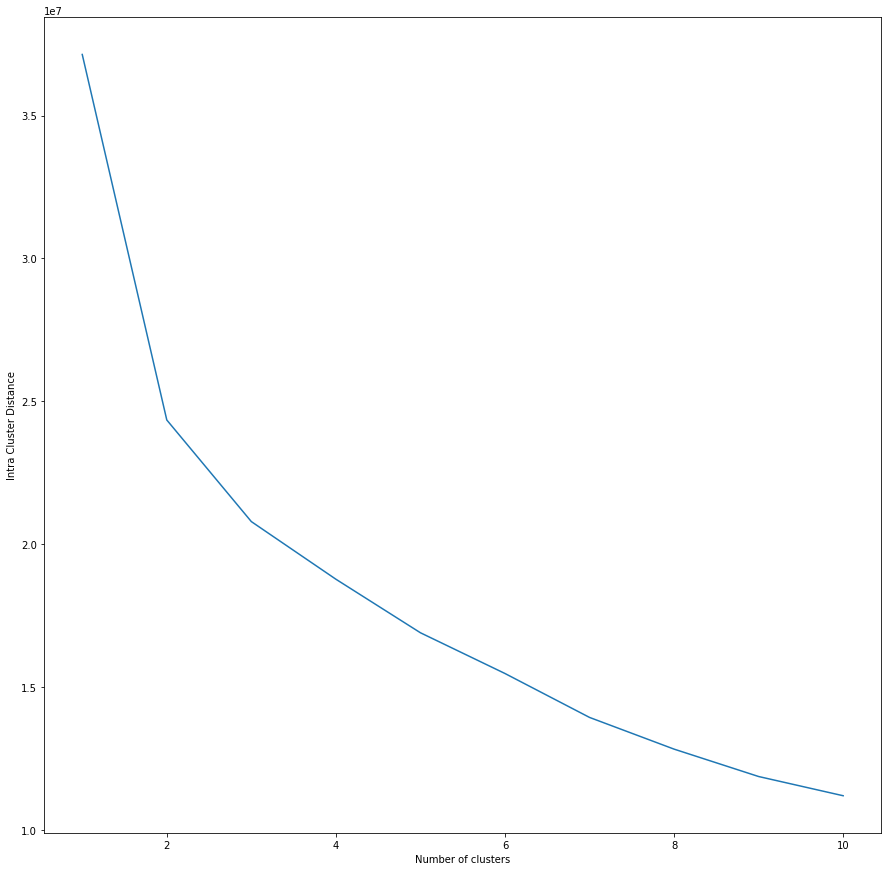

<Figure size 360x360 with 0 Axes>

In [188]:
plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.figure(figsize=(5, 5))
plt.show()

In [77]:
cluster_model = KMeans(n_clusters = 10, max_iter = 100, random_state = 1234).fit(clustering_sample_pca)

In [192]:
label = cluster_model.labels_
label

array([4, 6, 8, ..., 5, 4, 6])

# RADAR CHARTS

In [ ]:
# NOVA TABELA KOJA SE SASTOJI OD MEAN VALUES ZA CEO SKUP I NACRTATI RADAR ZA VRSTU = 0

In [161]:
labels=np.array(data_num.drop('Cluster',1).columns) 
stats=standard_data_preprocessed.mean().to_numpy()
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


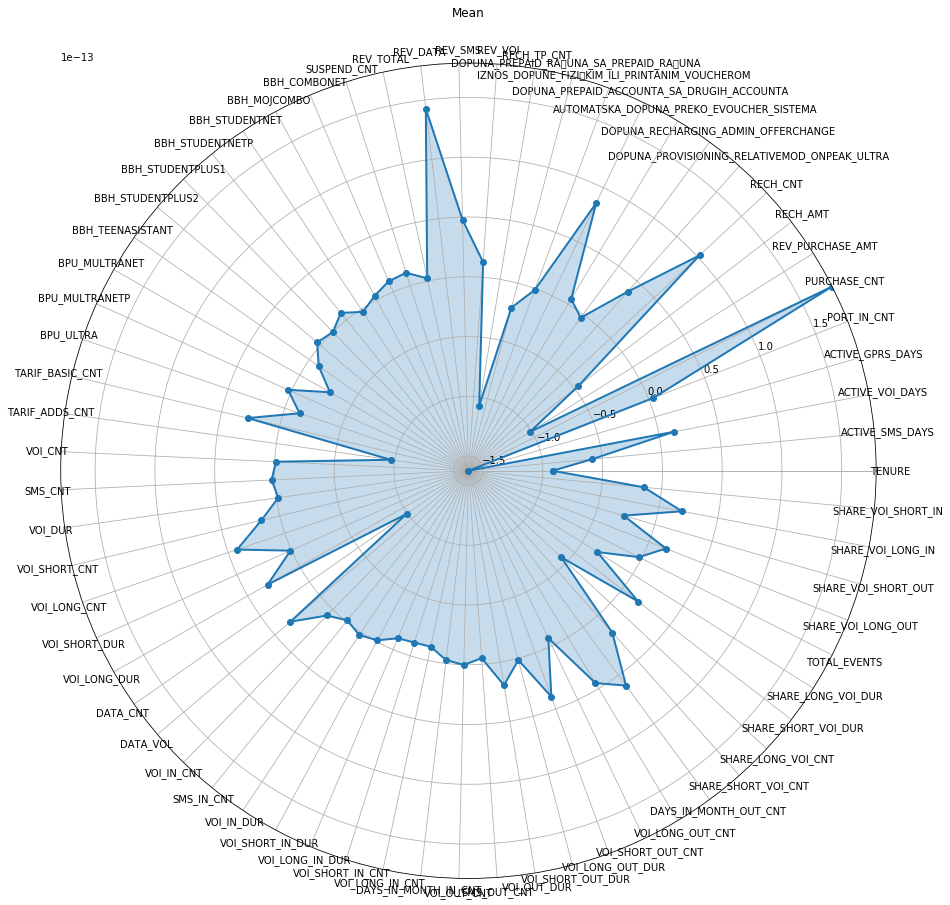

In [162]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Mean') 
ax.grid(True)

In [163]:
standard_data_preprocessed['Cluster'] = label
cluster0 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==0].drop('Cluster',1).mean().to_numpy()
cluster1 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==1].drop('Cluster',1).mean().to_numpy()
cluster2 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==2].drop('Cluster',1).mean().to_numpy()
cluster3 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==3].drop('Cluster',1).mean().to_numpy()
cluster4 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==4].drop('Cluster',1).mean().to_numpy()
cluster5 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==5].drop('Cluster',1).mean().to_numpy()
cluster6 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==6].drop('Cluster',1).mean().to_numpy()
cluster7 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==7].drop('Cluster',1).mean().to_numpy()
cluster8 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==8].drop('Cluster',1).mean().to_numpy()
cluster9 =standard_data_preprocessed[standard_data_preprocessed['Cluster']==9].drop('Cluster',1).mean().to_numpy()

In [ ]:
cluster0df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==0].drop('Cluster',1)
cluster1df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==1].drop('Cluster',1)
cluster2df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==2].drop('Cluster',1)
cluster3df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==3].drop('Cluster',1)
cluster4df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==4].drop('Cluster',1)
cluster5df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==5].drop('Cluster',1)
cluster6df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==6].drop('Cluster',1)
cluster7df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==7].drop('Cluster',1)
cluster8df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==8].drop('Cluster',1)
cluster9df =standard_data_preprocessed[standard_data_preprocessed['Cluster']==9].drop('Cluster',1)

In [ ]:
cluster0df.describe()

In [ ]:
cluster1df.describe()

In [ ]:
cluster2df.describe()

In [ ]:
cluster3df.describe()

In [ ]:
cluster4df.describe()

In [ ]:
cluster5df.describe()

In [ ]:
cluster6df.describe()

In [ ]:
cluster7df.describe()

In [ ]:
cluster8df.describe()

In [ ]:
cluster9df.describe()

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


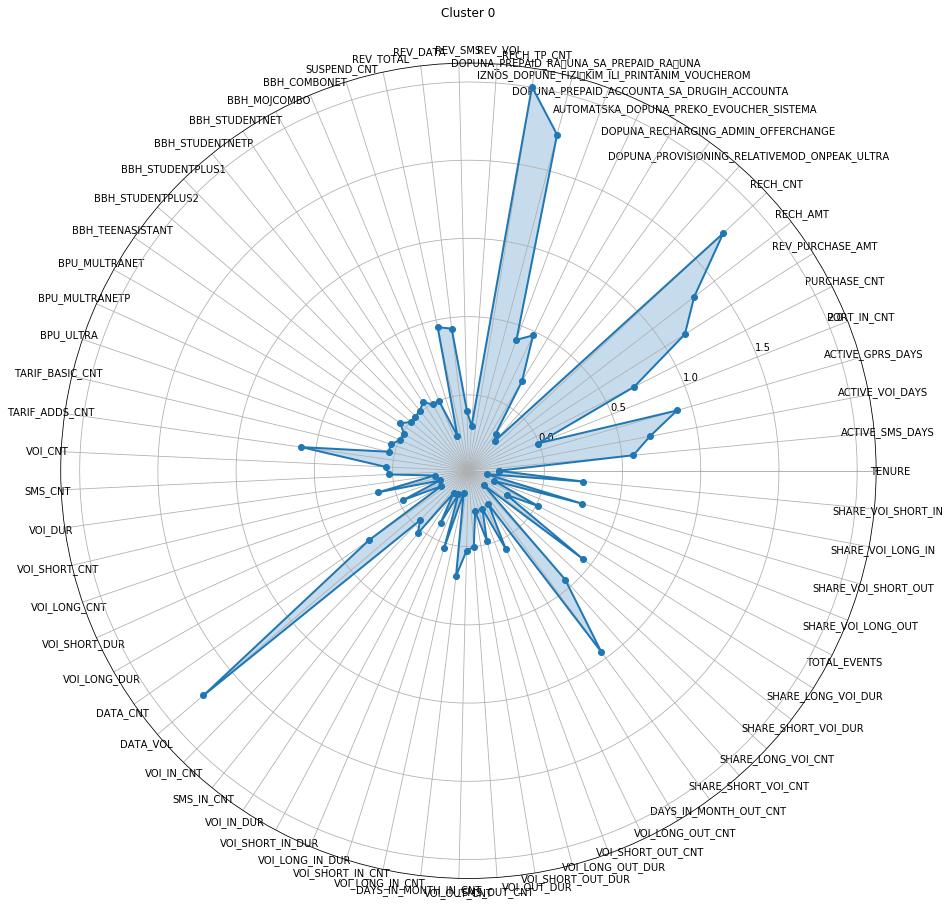

In [165]:
stats=cluster0
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 0') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


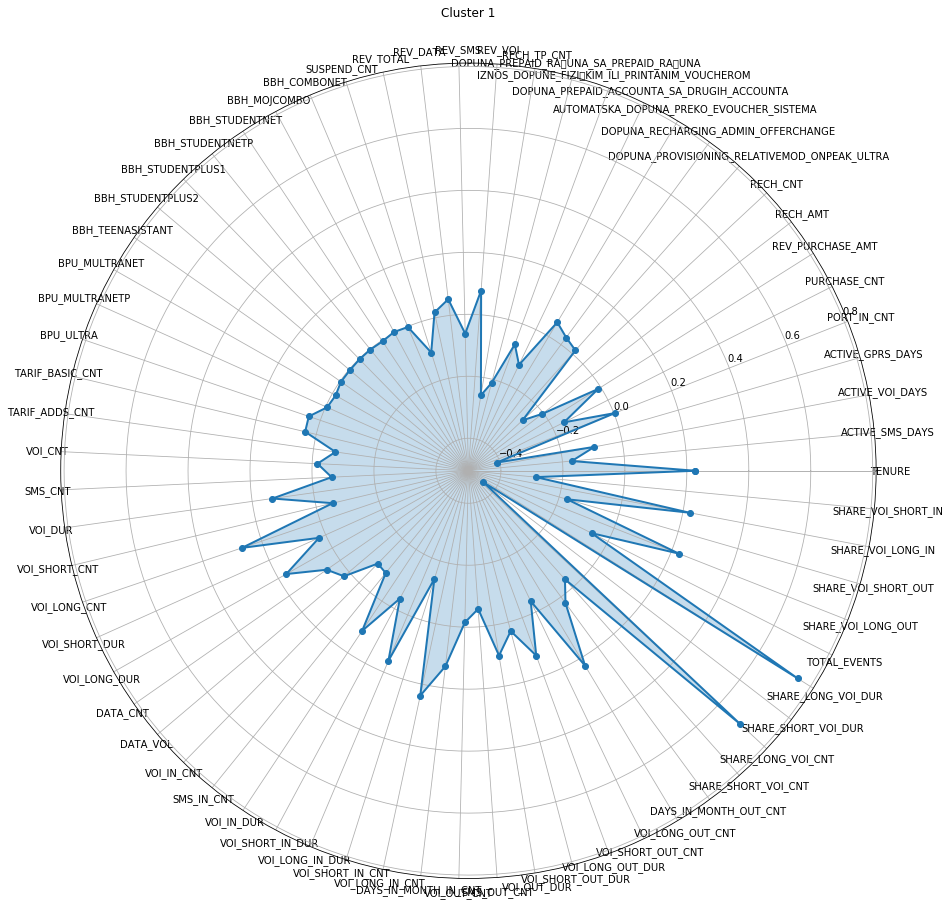

In [166]:
stats=cluster1
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 1') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


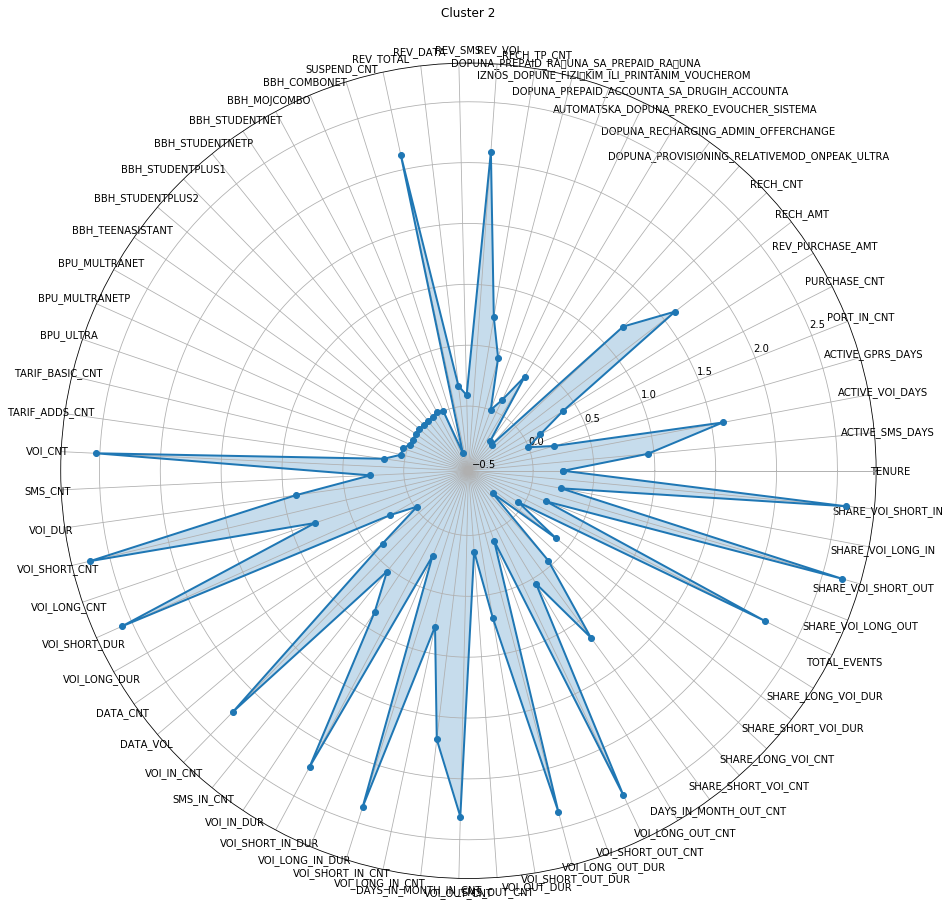

In [167]:
stats=cluster2
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 2') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


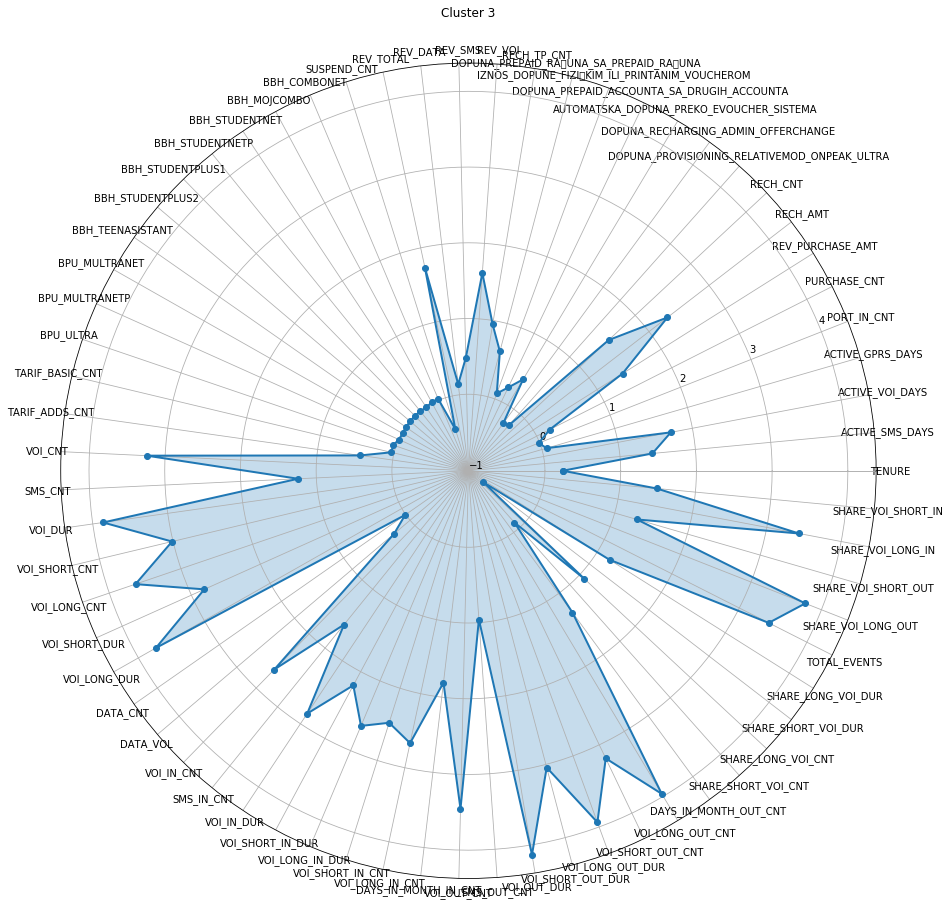

In [168]:
stats=cluster3
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 3') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


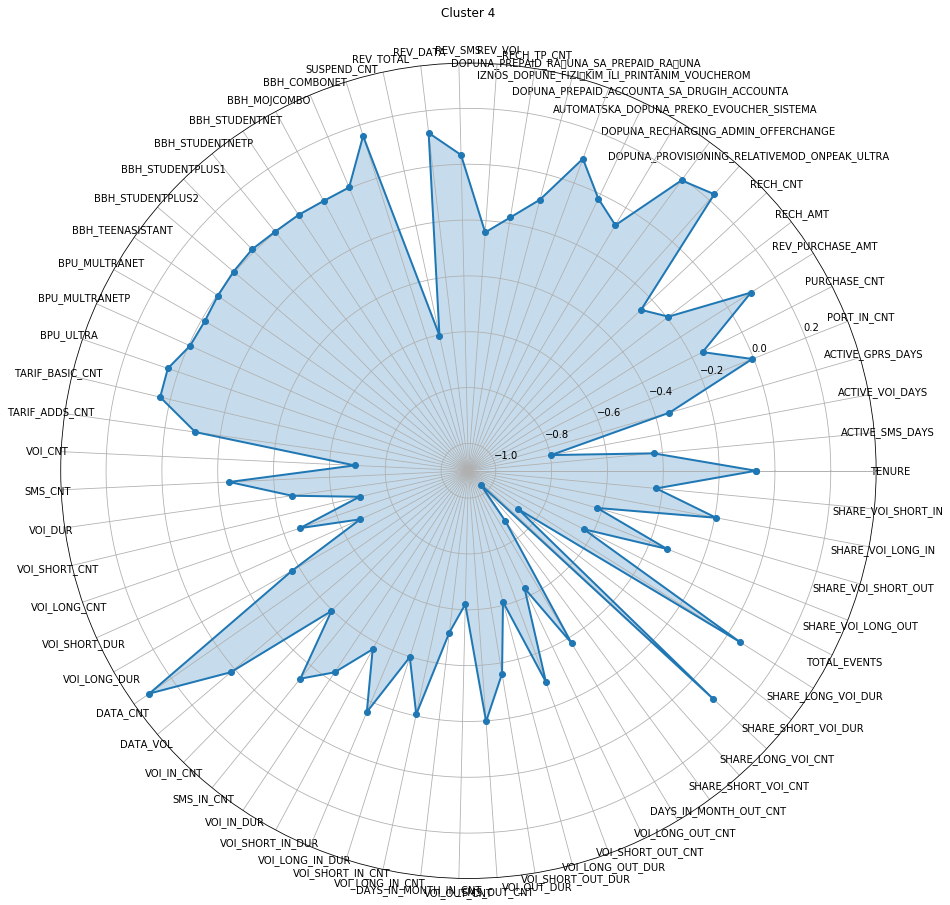

In [169]:
stats=cluster4
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 4') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


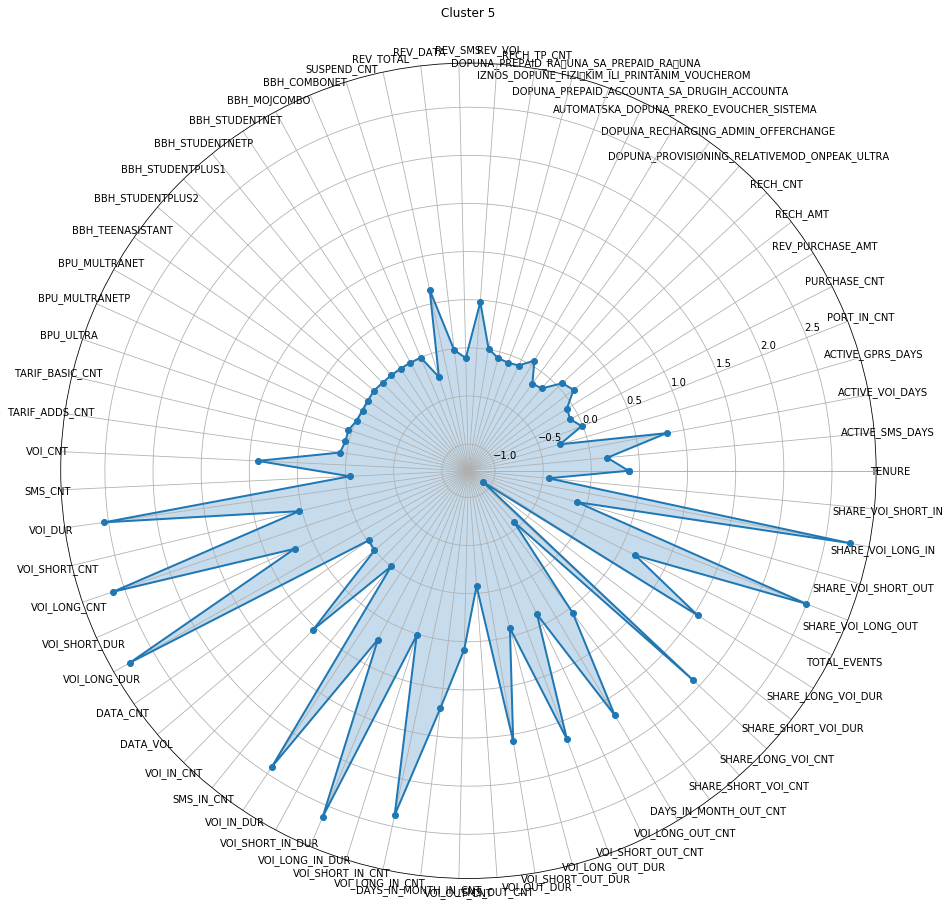

In [170]:
stats=cluster5
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 5') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


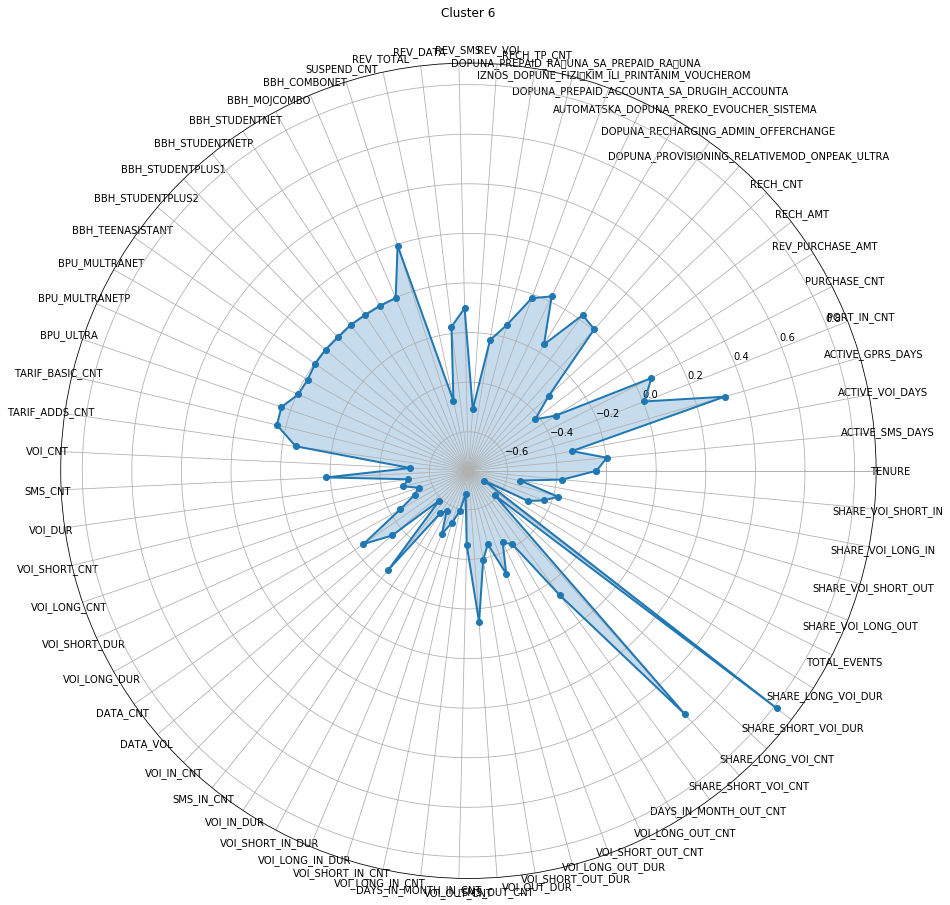

In [171]:
stats=cluster6
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 6') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


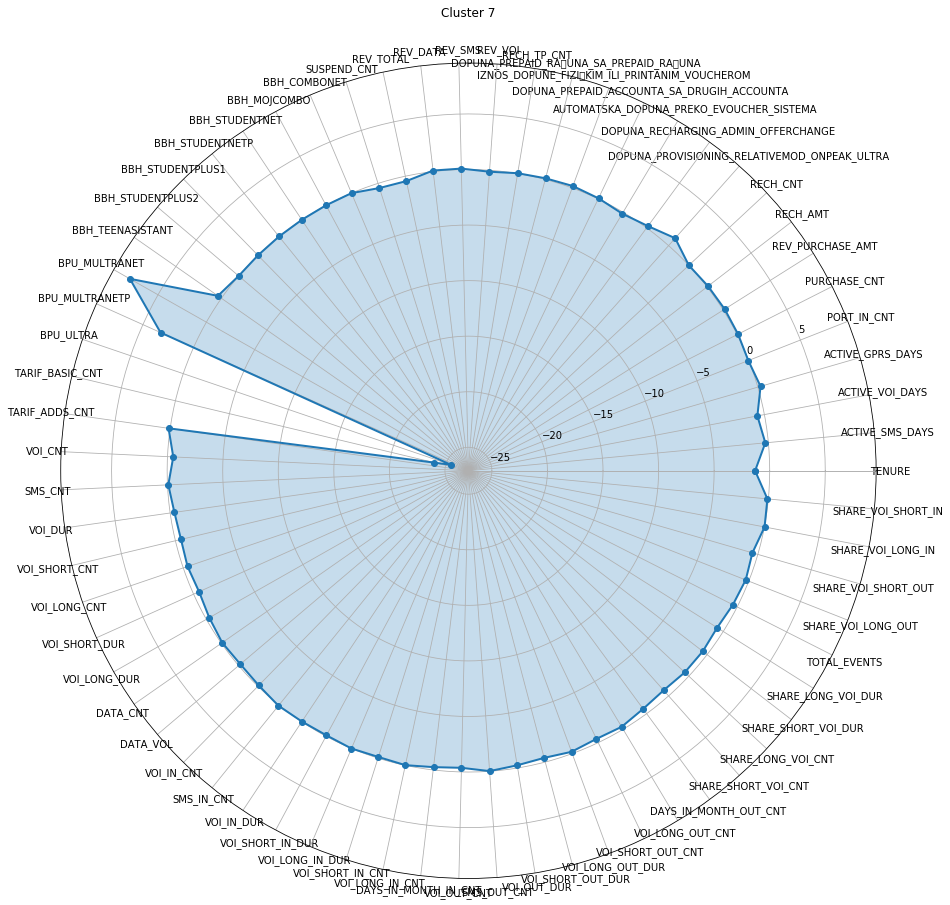

In [172]:
stats=cluster7
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 7') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


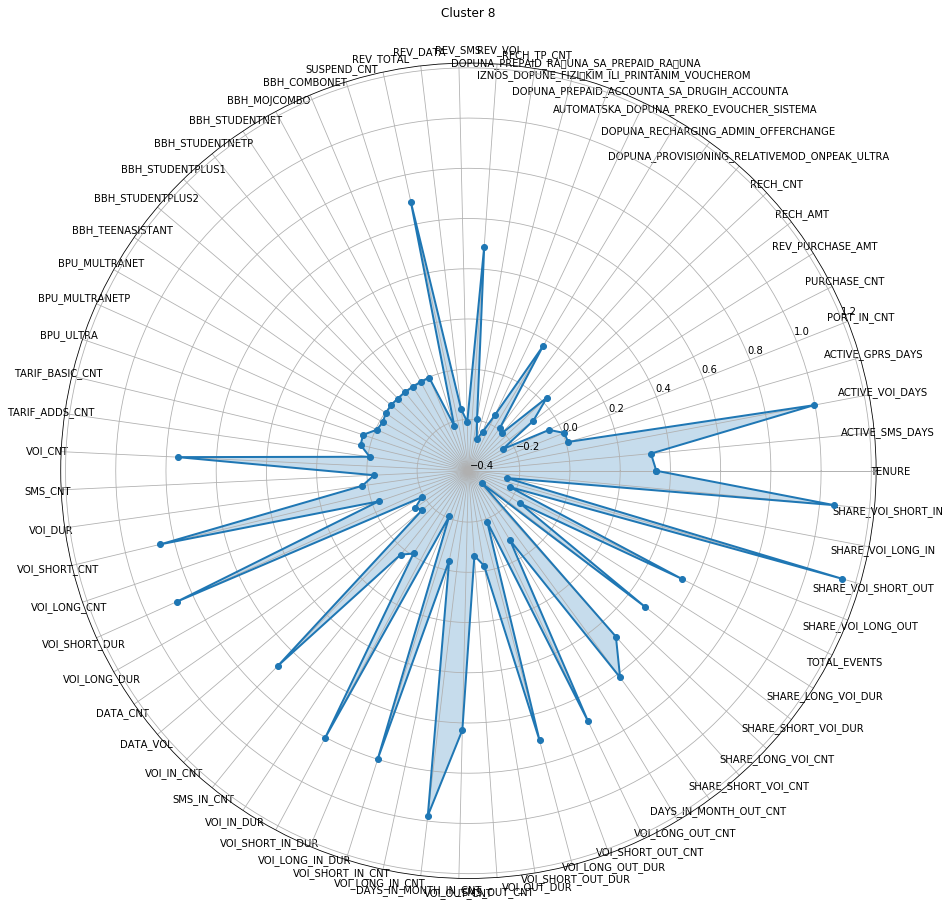

In [173]:
stats=cluster8
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 8') 
ax.grid(True)

C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stefanaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


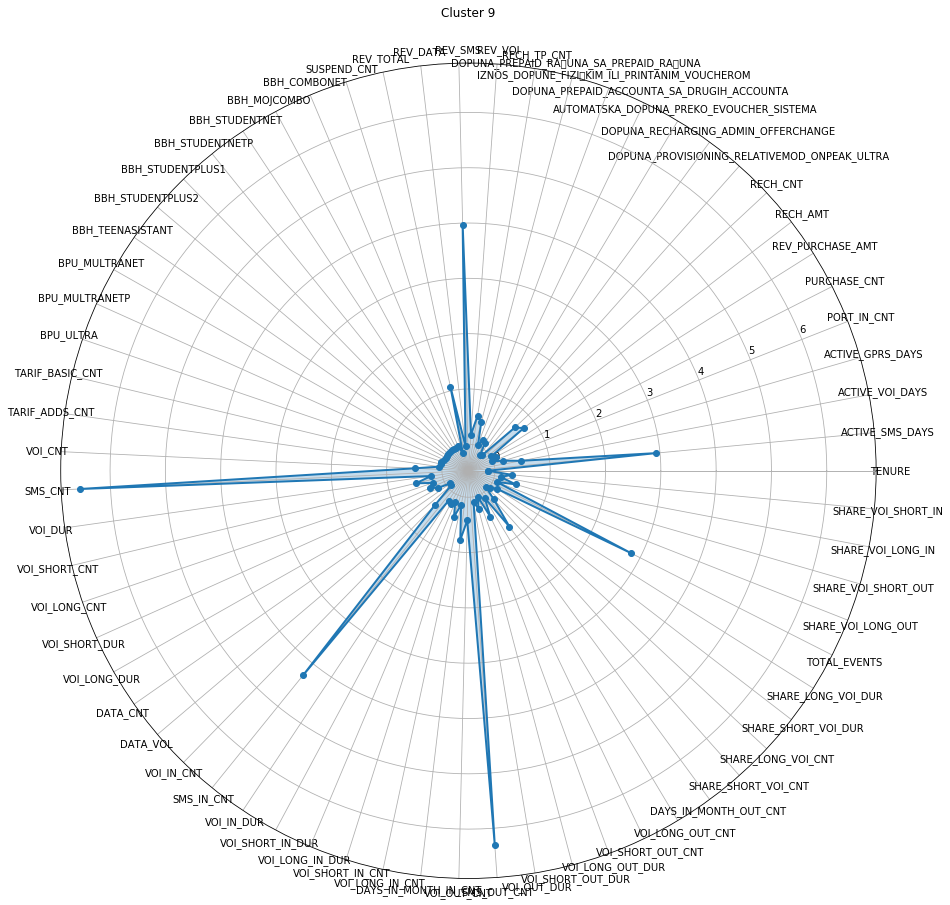

In [174]:
stats=cluster9
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot 
stats=np.concatenate((stats,[stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title('Cluster 9') 
ax.grid(True)

In [179]:
data_num['Cluster'].value_counts()

6    319178
4    233730
1    175802
8    106697
0     56619
5     49246
2     48419
3     23097
9     13401
7      1583
Name: Cluster, dtype: int64

Saving the model; change to True if you want to save it again

In [195]:
score = silhouette_score(clustering_sample_pca, label, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.197


In [197]:
db_index = davies_bouldin_score(clustering_sample_pca, label)
print(db_index)

1.2127518944303186


In [69]:
save_model = True

if save_model:
    pickle.dump(kmeans, open('kmeansCluster.sav', 'wb'))